In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
# pd.set_option('max_columns', 200)

In [38]:
df = pd.read_csv("Car_Insurance_Claim.csv")

## Step 1: Data Cleaning
* `shape`
* `head` and `tail`
* `dtypes`
* `describe`
    

In [39]:
df.head()

,Unnamed: 0,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0


The only unnecesary columns we have here is the first column which is duplicating the defolt pandas indices and the ID column which is not helpfull here at all. We dont need two same columns so we just drop it

In [40]:
df = df.drop(df.columns[[0, 1]], axis= 1)
df

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.5827870696562382,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,26-39,female,majority,10-19y,none,middle class,0.5222314755016938,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,26-39,male,majority,0-9y,high school,middle class,0.4709402314479679,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,26-39,female,majority,10-19y,high school,poverty,0.3641847847297929,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [41]:
#Drop The rows with missing target values, because we cant gain information from them
df.dropna(subset=['OUTCOME'], inplace=True)

Next we want to handle missing values. For numerical values we migh consider using mean or median imputation (including 'none' values). For categorical values, we will be using mode imputation (most frequent value) and we wont touch 'none' values, they can be helpful.


In [42]:
df.isna().sum()

AGE                      50
GENDER                   50
RACE                     48
DRIVING_EXPERIENCE       50
EDUCATION                48
INCOME                    0
CREDIT_SCORE           1015
VEHICLE_OWNERSHIP        49
VEHICLE_YEAR             50
MARRIED                  47
CHILDREN                 49
POSTAL_CODE              50
ANNUAL_MILEAGE          997
VEHICLE_TYPE             49
SPEEDING_VIOLATIONS      50
DUIS                     49
PAST_ACCIDENTS           50
OUTCOME                   0
dtype: int64

In [48]:
#Columns where we will replace missing values with mean
input_mean_columns = ["CREDIT_SCORE", "ANNUAL_MILEAGE"]
#Columns where we will replace missing values with none
categorical_columns = ["AGE", "GENDER", "RACE", "DRIVING_EXPERIENCE", "EDUCATION", "VEHICLE_OWNERSHIP", "VEHICLE_YEAR", "MARRIED", "CHILDREN", "POSTAL_CODE",
                       "VEHICLE_TYPE", "DUIS", "PAST_ACCIDENTS", "SPEEDING_VIOLATIONS"]

df[categorical_columns] = df[categorical_columns].fillna('none')

df[input_mean_columns] = df[input_mean_columns].replace('none', np.NaN)

df[input_mean_columns] = df[input_mean_columns].astype(float)


df[input_mean_columns] = df[input_mean_columns].fillna(df[input_mean_columns].mean())
df.isna().sum()



AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [46]:
df.dtypes

Unnamed: 0              int64
ID                      int64
AGE                    object
GENDER                 object
RACE                   object
DRIVING_EXPERIENCE     object
EDUCATION              object
INCOME                 object
CREDIT_SCORE           object
VEHICLE_OWNERSHIP      object
VEHICLE_YEAR           object
MARRIED                object
CHILDREN               object
POSTAL_CODE            object
ANNUAL_MILEAGE         object
VEHICLE_TYPE           object
SPEEDING_VIOLATIONS    object
DUIS                   object
PAST_ACCIDENTS         object
OUTCOME                object
dtype: object

In [9]:
#There is no point to use this function but i will leave it here so u can see why
df.describe()

,Unnamed: 0,ID
count,10000.00000,10000.000000
mean,4999.50000,500521.906800
std,2886.89568,290030.768758
min,0.00000,101.000000
25%,2499.75000,249638.500000
50%,4999.50000,501777.000000
75%,7499.25000,753974.500000
max,9999.00000,999976.000000


## Step 2: Data Preparation
* Dropping irrelevant columns and rows
* Identifying duplicate columns if they exist
* Feature creation (if needed)

In [10]:
df.head()

,Unnamed: 0,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,569520,65+,female,majority,0-9y,high school,upper class,0.629027313918201,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,1,750365,16-25,male,majority,0-9y,none,poverty,0.3577571170184627,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,2,199901,16-25,female,majority,0-9y,high school,working class,0.4931457852181982,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,3,478866,16-25,male,majority,0-9y,university,working class,0.2060128507324556,1.0,before 2015,0.0,none,32765,11000.0,sedan,0,0,0,0.0
4,4,731664,26-39,male,majority,10-19y,none,working class,0.3883658881572184,1.0,before 2015,0.0,0.0,32765.0,12000.0,sedan,2,0,1,1.0


We can see that some data values are set to `none`, it can be helpful to understand problem well if we can tell that in some cases we have missing data.
Also `none` used across the dataset, which means that we can now replace every `Nan` value with `none`

In [58]:
df = df.fillna('none')
df.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [14]:
df.loc[df.duplicated()]

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME


## Step 3: Descriptive Statistics
* Feature understanding
* Feature relationships

#### Feature understanding
* Plotting distributions

Text(0, 0.5, 'Age Introduced')

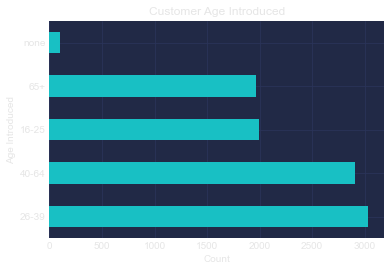

In [25]:
ax = df["AGE"].value_counts().plot(kind="barh", title="Customer Age Introduced")
ax.set_xlabel("Count")
ax.set_ylabel("Age Introduced")

In [59]:
df["ANNUAL_MILEAGE"].replace('none', np.NaN, inplace = True)
df["ANNUAL_MILEAGE"] = df["ANNUAL_MILEAGE"].astype(np.float16)

Text(0.5, 0, 'Annual Mileage')

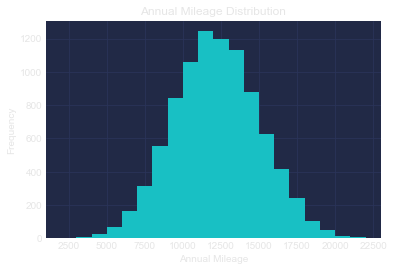

In [65]:
ax = df["ANNUAL_MILEAGE"].plot(kind = "hist", bins = 20, title = "Annual Mileage Distribution")
ax.set_xlabel("Annual Mileage")
ax.set_xlabel

In [61]:
df["ANNUAL_MILEAGE"]

0       12000.0
1       16000.0
2       11000.0
3       11000.0
4       12000.0
         ...   
9995    16000.0
9996        NaN
9997    14000.0
9998    13000.0
9999    13000.0
Name: ANNUAL_MILEAGE, Length: 10000, dtype: float16